In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/신입프로젝트/whole_data_finally.csv')


# 전체 데이터 생성 과정

In [3]:
data = data.drop('Unnamed: 0', axis = 1)
data

,row_num,location,cafe_name,review,label,new_review
0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,4,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,..."
1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,3,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb..."
2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,2,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve..."
3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,4,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너..."
4,4,강남역,카페노티드 청담,감사합니다,1,감사하다/Verb
...,...,...,...,...,...,...
34484,34484,한남동,모모,조금 아쉬워요,2,"조금/Noun,아쉽다/Adjective"
34485,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,5,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou..."
34486,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,5,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun"
34487,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,4,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무..."


In [4]:
data['LSTM_pp'] = data['new_review']
data['label_org'] = data['label']
data.drop('new_review',axis =1, inplace = True)
data.drop('label',axis =1, inplace = True)
data

,row_num,location,cafe_name,review,LSTM_pp,label_org
0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4
1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",3
2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2
3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4
4,4,강남역,카페노티드 청담,감사합니다,감사하다/Verb,1
...,...,...,...,...,...,...
34484,34484,한남동,모모,조금 아쉬워요,"조금/Noun,아쉽다/Adjective",2
34485,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",5
34486,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",5
34487,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",4


In [39]:
def mod_label(org_label):
  x= 0
  if org_label < 3:
    x = 0
  elif org_label == 3:
    x = 3
  else:
    x = 1
  return x

In [40]:
data['label_mod'] = data['label_org'].apply(mod_label)
data.head(10)

,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod
0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4,1
1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",3,3
2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2,0
3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4,1
4,4,강남역,카페노티드 청담,감사합니다,감사하다/Verb,1,0
5,5,강남역,카페노티드 청담,바닐라맛 맛있어요! 도넛 사는데.. 40분? 기다린거 같네요 . 이왕 간김에 조각 ...,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",4,1
6,6,강남역,카페노티드 청담,도넛 맛은 맛있음 대신 포장해서 갈거면 인내심 길러가야함 뭔가 포장하는 방식이 바뀌...,"도넛/Noun,맛/Noun,맛있다/Adjective,대신/Noun,포장/Noun,하...",3,3
7,7,강남역,카페노티드 청담,계산해주는 직원도 불친절하고 크로플도 두개시켰는데 집에 와서 열어보니 한개만 줬네요...,"계산/Noun,해주다/Verb,직원/Noun,불친절하다/Adjective,크다/Ve...",1,0
8,8,강남역,카페노티드 청담,좋아요,좋다/Adjective,4,1
9,9,강남역,카페노티드 청담,최고예요,최고/Noun,5,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_num    34489 non-null  int64 
 1   location   34489 non-null  object
 2   cafe_name  34489 non-null  object
 3   review     34489 non-null  object
 4   LSTM_pp    33719 non-null  object
 5   label_org  34489 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [29]:
import re
def select_tokens(org_tokens):
  regex1 = re.compile('Noun$')
  regex2 = re.compile('Adjective$')
  res = []
  for item in org_tokens.split(','):
    mo1 = regex1.search(item)
    mo2 = regex2.search(item)
    if mo1 != None or mo2 != None:
      res.append(item.split('/')[0])
  
  return ' '.join(res)

In [54]:
data['LDA_pp'] = data['LSTM_pp']

In [ ]:
for i in range(len(data)):
  if data['LSTM_pp'].isnull()[i] == False:
    string = data.LSTM_pp.iloc[i]
    data.LDA_pp.iloc[i] = select_tokens(string)
    print('{}번째: {}'.format(i,data.LDA_pp.iloc[i]))

In [61]:
data

,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod,LDA_pp
0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4,1,그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...
1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",3,3,우유 크림 개 맛있다 혼잡하다 또 곳
2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2,0,도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...
3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4,1,도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못
4,4,강남역,카페노티드 청담,감사합니다,감사하다/Verb,1,0,
...,...,...,...,...,...,...,...,...
34484,34484,한남동,모모,조금 아쉬워요,"조금/Noun,아쉽다/Adjective",2,0,조금 아쉽다
34485,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",5,1,우리 모두 어떻다 기대 있다 일 곳 점 헤헤
34486,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",5,1,가격 합리 분위기 후 굿
34487,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",4,1,조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34489 entries, 0 to 34488
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_num    34489 non-null  int64 
 1   location   34489 non-null  object
 2   cafe_name  34489 non-null  object
 3   review     34489 non-null  object
 4   LSTM_pp    33719 non-null  object
 5   label_org  34489 non-null  int64 
 6   label_mod  34489 non-null  int64 
 7   LDA_pp     33719 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.1+ MB


In [63]:
data[data.LDA_pp.isnull()]

,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod,LDA_pp
27,27,강남역,카페노티드 청담,ㅈㅁㅌ,NaN,4,1,NaN
111,111,강남역,카페노티드 청담,Fresh Donuts,NaN,3,3,NaN
163,163,강남역,블루보틀 역삼,Coffee,NaN,3,3,NaN
191,191,강남역,랑데자뷰 강남점,Coffee,NaN,3,3,NaN
216,216,강남역,꽁티드툴레아 도산점,Brunch or Coffee,NaN,3,3,NaN
...,...,...,...,...,...,...,...,...
34440,34440,한남동,모또,Japanese Style Dessert,NaN,3,3,NaN
34449,34449,한남동,오리앙떼,Oatmeal Latte with a Le Cube,NaN,3,3,NaN
34458,34458,한남동,컨템포러리1,Kontemporary1 Coffee & Tea,NaN,3,3,NaN
34470,34470,한남동,릴리펏 한남더힐점,Not really interesting for younger kids. The b...,NaN,3,3,NaN


In [67]:
def less_than_three(string):
  if len(string.split(' '))<3:
    return '기타'
  else:
    return 'Unlabeled'

In [69]:
data['category'] = data['LDA_pp']
for i in range(len(data)):
  if data['LDA_pp'].isnull()[i] == False:
    string = data.LDA_pp.iloc[i]
    data.category.iloc[i] = less_than_three(string)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [70]:
data.head(30)

,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod,LDA_pp,category
0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4,1,그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...,Unlabeled
1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",3,3,우유 크림 개 맛있다 혼잡하다 또 곳,Unlabeled
2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2,0,도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...,Unlabeled
3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4,1,도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못,Unlabeled
4,4,강남역,카페노티드 청담,감사합니다,감사하다/Verb,1,0,,기타
5,5,강남역,카페노티드 청담,바닐라맛 맛있어요! 도넛 사는데.. 40분? 기다린거 같네요 . 이왕 간김에 조각 ...,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",4,1,바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...,Unlabeled
6,6,강남역,카페노티드 청담,도넛 맛은 맛있음 대신 포장해서 갈거면 인내심 길러가야함 뭔가 포장하는 방식이 바뀌...,"도넛/Noun,맛/Noun,맛있다/Adjective,대신/Noun,포장/Noun,하...",3,3,도넛 맛 맛있다 대신 포장 거 인내심 가야 함 뭔가 포장 방식 거 같다,Unlabeled
7,7,강남역,카페노티드 청담,계산해주는 직원도 불친절하고 크로플도 두개시켰는데 집에 와서 열어보니 한개만 줬네요...,"계산/Noun,해주다/Verb,직원/Noun,불친절하다/Adjective,크다/Ve...",1,0,계산 직원 불친절하다 프로도 두 개시 집 어보 개 안 예정 이다,Unlabeled
8,8,강남역,카페노티드 청담,좋아요,좋다/Adjective,4,1,좋다,기타
9,9,강남역,카페노티드 청담,최고예요,최고/Noun,5,1,최고,기타


In [71]:
data.to_csv('/content/drive/MyDrive/신입프로젝트/total_data_before_model.csv')

# 트레인용 데이터 생성

In [5]:
data = pd.read_csv('/content/drive/MyDrive/신입프로젝트/total_data_before_model.csv')

In [6]:
data.dropna(inplace = True)

In [7]:
data

,Unnamed: 0,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod,LDA_pp,category
0,0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4,1,그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...,Unlabeled
1,1,1,강남역,카페노티드 청담,우유크림 개맛있슴 근데 그만큼 혼잡해서 또 가고싶지 않은 곳..,"우유/Noun,크림/Noun,개/Noun,맛있다/Adjective,근데/Adverb...",3,3,우유 크림 개 맛있다 혼잡하다 또 곳,Unlabeled
2,2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2,0,도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...,Unlabeled
3,3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4,1,도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못,Unlabeled
5,5,5,강남역,카페노티드 청담,바닐라맛 맛있어요! 도넛 사는데.. 40분? 기다린거 같네요 . 이왕 간김에 조각 ...,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",4,1,바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...,Unlabeled
...,...,...,...,...,...,...,...,...,...,...
34484,34484,34484,한남동,모모,조금 아쉬워요,"조금/Noun,아쉽다/Adjective",2,0,조금 아쉽다,기타
34485,34485,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",5,1,우리 모두 어떻다 기대 있다 일 곳 점 헤헤,Unlabeled
34486,34486,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",5,1,가격 합리 분위기 후 굿,Unlabeled
34487,34487,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",4,1,조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...,Unlabeled


In [8]:
data = data[data.label_org != 0]
data = data[data.label_org != 3]
data

,Unnamed: 0,row_num,location,cafe_name,review,LSTM_pp,label_org,label_mod,LDA_pp,category
0,0,0,강남역,카페노티드 청담,그냥 그렇다 생각했는데 다른 곳에서 도넛 먹고나면? ㄷ ㄷ 킹티드 .. 잘되는 이유...,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",4,1,그냥 그렇다 생각 다른 곳 넛 킹 드 이유 있다 그냥 갤러리아 지하 게 갑자기 확장...,Unlabeled
2,2,2,강남역,카페노티드 청담,도넛은 맛있는데 종업원들 대응이 너무 느려요. 한남이랑 삼성점도 가봤는데 여기가 유...,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",2,0,도넛 맛있다 종업원 대응 느리다 한남 삼성 점도 여기 손 느리다 듯 직원 많다 왜 ...,Unlabeled
3,3,3,강남역,카페노티드 청담,도넛이 맛은 있는데 줄이 진짜 너엉어ㅓㅓ어어어어무 길다 예약해서 가져갈거면 가고 가...,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",4,1,도넛 맛 있다 진짜 엉 어어 무길 예약 거 절대 못,Unlabeled
5,5,5,강남역,카페노티드 청담,바닐라맛 맛있어요! 도넛 사는데.. 40분? 기다린거 같네요 . 이왕 간김에 조각 ...,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",4,1,바닐라 맛 맛있다 도 넛 분 거 같다 이 왕관 김 조각 케이크 사고 살라 다시 줄 ...,Unlabeled
7,7,7,강남역,카페노티드 청담,계산해주는 직원도 불친절하고 크로플도 두개시켰는데 집에 와서 열어보니 한개만 줬네요...,"계산/Noun,해주다/Verb,직원/Noun,불친절하다/Adjective,크다/Ve...",1,0,계산 직원 불친절하다 프로도 두 개시 집 어보 개 안 예정 이다,Unlabeled
...,...,...,...,...,...,...,...,...,...,...
34484,34484,34484,한남동,모모,조금 아쉬워요,"조금/Noun,아쉽다/Adjective",2,0,조금 아쉽다,기타
34485,34485,34485,한남동,모모,우리는 결국 모두 어떤 기대 없이 하도록 돼 있는 일을 하게 된다. 그래서 이 곳은...,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",5,1,우리 모두 어떻다 기대 있다 일 곳 점 헤헤,Unlabeled
34486,34486,34486,한남동,모모,가격도 합리적이고 분위기두 굿!,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",5,1,가격 합리 분위기 후 굿,Unlabeled
34487,34487,34487,한남동,모모,조용한 골목에 있어서 일단 너무 좋아요. 분위기도 예쁘고. 여긴 독특하게 시간당으로...,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",4,1,조용하다 골목 있다 일단 좋다 분위기 예쁘다 독특하다 시간 계산 계산기 편 아니다 ...,Unlabeled


In [9]:
data.drop(['Unnamed: 0','location',	'cafe_name','review','label_org','LDA_pp','category'], axis = 1,inplace = True)
data

,row_num,LSTM_pp,label_mod
0,0,"그냥/Noun,그렇다/Adjective,생각/Noun,하다/Verb,다른/Noun,...",1
2,2,"도넛/Noun,맛있다/Adjective,종업원/Noun,대응/Noun,너무/Adve...",0
3,3,"도넛/Noun,맛/Noun,있다/Adjective,줄이다/Verb,진짜/Noun,너...",1
5,5,"바닐라/Noun,맛/Noun,맛있다/Adjective,도/Noun,넛/Noun,살다...",1
7,7,"계산/Noun,해주다/Verb,직원/Noun,불친절하다/Adjective,크다/Ve...",0
...,...,...,...
34484,34484,"조금/Noun,아쉽다/Adjective",0
34485,34485,"우리/Noun,결국/Adverb,모두/Noun,어떻다/Adjective,기대/Nou...",1
34486,34486,"가격/Noun,합리/Noun,분위기/Noun,후/Noun,굿/Noun",1
34487,34487,"조용하다/Adjective,골목/Noun,있다/Adjective,일단/Noun,너무...",1


In [10]:
data.label_mod.value_counts()

1    17938
0     6735
Name: label_mod, dtype: int64

In [11]:
data.to_csv('/content/drive/MyDrive/신입프로젝트/training_data_for_lstm.csv')

# 여기서부터 돌리면 됨!

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/신입프로젝트/training_data_for_lstm.csv')

In [3]:
y = []
for i in data.label_mod:
  y.append(i)
y

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [4]:
X = []
for i in data.LSTM_pp:
  xinnerlist = i.split(',')
  X.append(xinnerlist)

X

[['그냥/Noun',
  '그렇다/Adjective',
  '생각/Noun',
  '하다/Verb',
  '다른/Noun',
  '곳/Noun',
  '넛/Noun',
  '먹다/Verb',
  '나다/Verb',
  '킹/Noun',
  '드/Noun',
  '자다/Verb',
  '되다/Verb',
  '이유/Noun',
  '있다/Adjective',
  '근데/Adverb',
  '그냥/Noun',
  '갤러리아/Noun',
  '지하/Noun',
  '먹다/Verb',
  '게/Noun',
  '갑자기/Noun',
  '확장/Noun',
  '이전/Noun',
  '하다/Verb',
  '웨이/Noun',
  '팅/Noun',
  '생기다/Verb',
  '뭐/Noun'],
 ['도넛/Noun',
  '맛있다/Adjective',
  '종업원/Noun',
  '대응/Noun',
  '너무/Adverb',
  '느리다/Adjective',
  '한남/Noun',
  '삼성/Noun',
  '점도/Noun',
  '가보다/Verb',
  '여기/Noun',
  '유난히/Adverb',
  '손/Noun',
  '느리다/Adjective',
  '듯/Noun',
  '직원/Noun',
  '많다/Adjective',
  '왜/Noun',
  '이렇게/Adverb',
  '느리다/Adjective',
  '건지다/Verb',
  '이해/Noun',
  '좀/Noun',
  '안/Noun',
  '되다/Verb'],
 ['도넛/Noun',
  '맛/Noun',
  '있다/Adjective',
  '줄이다/Verb',
  '진짜/Noun',
  '너/Modifier',
  '엉/Noun',
  '어어/Noun',
  '무길/Noun',
  '다/Adverb',
  '예약/Noun',
  '하다/Verb',
  '가져가다/Verb',
  '거/Noun',
  '가다/Verb',
  '가다/Verb',
  '절대/Noun',
  '못/Noun',
  '기다리다/V

# 트레인/테스트 나누기


In [5]:
!pip install sklearn

import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [7]:
y_train_df = pd.DataFrame(y_train)
y_train_df

,0
0,0
1,0
2,1
3,0
4,1
...,...
19733,1
19734,0
19735,1
19736,1


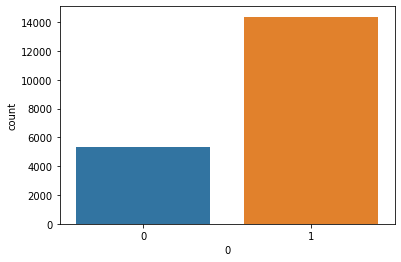

In [8]:
import seaborn as sns

ax = sns.countplot(x = 0, data = y_train_df)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [10]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11692
등장 빈도가 2번 이하인 희귀 단어의 수: 6152
단어 집합에서 희귀 단어의 비율: 52.61717413616148
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.060536914807271


In [11]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5542


In [115]:
#tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
#tokenizer.fit_on_texts(X_train)
#X_train = tokenizer.texts_to_sequences(X_train)
#X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1] 

In [13]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

19738
19738


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index

X_test = tokenizer.texts_to_sequences(X_test)

# 패딩

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 13.233154321613132


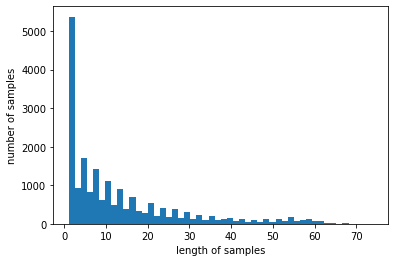

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [16]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [17]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 87.52153207011855


In [18]:
import json
json = json.dumps(word_index)
f3 = open("/content/drive/MyDrive/신입프로젝트/wordIndex.json", "w")
f3.write(json)
f3.close()

#data = pad_sequences(X_train, maxlen=max_len)

In [19]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

#LSTM 모델 만들기

In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras

In [21]:
model = Sequential()
model.add(Embedding(vocab_size, 100))  #임베딩 백터의 차원 100
model.add(LSTM(128))
model.add(Dense(1, activation='tanh'))

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_final.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], 
                    batch_size=60, validation_split=0.2)

Epoch 1/15
264/264 [==============================] - 24s 84ms/step - loss: 0.7058 - acc: 0.7327 - val_loss: 0.2760 - val_acc: 0.9222

Epoch 00001: val_acc improved from -inf to 0.92224, saving model to best_model_final.h5
Epoch 2/15
264/264 [==============================] - 21s 81ms/step - loss: 0.2635 - acc: 0.9148 - val_loss: 0.2384 - val_acc: 0.9159

Epoch 00002: val_acc did not improve from 0.92224
Epoch 3/15
264/264 [==============================] - 21s 81ms/step - loss: 0.1758 - acc: 0.9460 - val_loss: 0.2996 - val_acc: 0.9326

Epoch 00003: val_acc improved from 0.92224 to 0.93262, saving model to best_model_final.h5
Epoch 4/15
264/264 [==============================] - 21s 81ms/step - loss: 0.1472 - acc: 0.9630 - val_loss: 0.3315 - val_acc: 0.9278

Epoch 00004: val_acc did not improve from 0.93262
Epoch 5/15
264/264 [==============================] - 22s 82ms/step - loss: 0.1248 - acc: 0.9700 - val_loss: 0.3968 - val_acc: 0.9298

Epoch 00005: val_acc did not improve from 0.93

In [24]:
loaded_model = load_model('best_model_final.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, np.array(y_test))[1]))

155/155 [==============================] - 3s 13ms/step - loss: 0.3144 - acc: 0.9161

 테스트 정확도: 0.9161


In [25]:
loaded_model.save('/content/drive/MyDrive/신입프로젝트/best_lstm_model_final.h5')

# 여기서부터는 모델 테스팅

In [27]:
!pip install konlpy 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt

     |████████████████████████████████| 19.4MB 36.5MB/s 
     |████████████████████████████████| 460kB 44.6MB/s 
     |████████████████████████████████| 92kB 7.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [28]:
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [33]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [34]:
sentiment_predict('여기 커피가 정말 너무 맛있어요 최고예요 직원도 친절해요')

60.90% 확률로 긍정 리뷰입니다.



In [35]:
sentiment_predict('더러워 직원이 불친절해요 짜증나 싫어')

67.97% 확률로 긍정 리뷰입니다.

